In [0]:
import pandas as pd


In [230]:
pwd

'/content'

In [0]:
devices=pd.read_csv('/content/devices.csv')
notifications=pd.read_csv('/content/notifications.csv')
users=pd.read_csv('/content/users.csv')

In [232]:
print('the shape of devices is: ',devices.shape)
print('the shape of notifications is: ',notifications.shape)
print('the shape of users is: ',users.shape)

the shape of devices is:  (15544, 2)
the shape of notifications is:  (97704, 5)
the shape of users is:  (15544, 12)


In [0]:
devices = devices.set_index('user_id')

In [0]:
df=pd.merge(users,devices,on='user_id')

In [0]:
userdf=df.set_index('user_id')

In [236]:
userdf.head(2)

,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand
user_id,,,,,,,,,,,,
user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,Apple
user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0,Apple


In [237]:
userdf.isnull().sum()

birth_year                                     0
country                                        0
city                                           0
created_date                                   0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5260
attributes_notifications_marketing_email    5260
num_contacts                                   0
num_referrals                                  0
num_successful_referrals                       0
brand                                          0
dtype: int64

In [238]:
userdf.attributes_notifications_marketing_email.value_counts()


1.0    9209
0.0    1075
Name: attributes_notifications_marketing_email, dtype: int64

In [239]:
userdf.attributes_notifications_marketing_push.value_counts()

1.0    9752
0.0     532
Name: attributes_notifications_marketing_push, dtype: int64

In [240]:
userdf['plan'].unique(),userdf['brand'].unique()

(array(['STANDARD', 'GOLD', 'SILVER'], dtype=object),
 array(['Apple', 'Android', 'Unknown'], dtype=object))

In [241]:
userdf.dtypes

birth_year                                    int64
country                                      object
city                                         object
created_date                                 object
user_settings_crypto_unlocked                 int64
plan                                         object
attributes_notifications_marketing_push     float64
attributes_notifications_marketing_email    float64
num_contacts                                  int64
num_referrals                                 int64
num_successful_referrals                      int64
brand                                        object
dtype: object

In [242]:
userdf.iloc[:,1].unique()

array(['ES', 'LT', 'IE', 'GB', 'MT', 'FR', 'RO', 'PL', 'AT', 'IT', 'SI',
       'CZ', 'BE', 'BG', 'GI', 'CH', 'GG', 'CY', 'LV', 'DE', 'SK', 'GR',
       'DK', 'PT', 'LU', 'HR', 'NL', 'NO', 'SE', 'AU', 'IM', 'FI', 'EE',
       'JE', 'HU', 'RE', 'IS', 'GP', 'LI', 'MQ'], dtype=object)

In [243]:
userdf.iloc[:,2].unique()

array(['Madrid', 'Klaipeda', 'Carrickmacross', ..., 'Schilde', 'Bralin',
       'Andover'], dtype=object)

In [244]:
userdf.iloc[:,8].value_counts()

0      5539
2       547
1       526
3       525
4       489
       ... 
212       1
236       1
244       1
252       1
379       1
Name: num_contacts, Length: 283, dtype: int64

In [245]:
userdf.iloc[:,9].value_counts()

0    15544
Name: num_referrals, dtype: int64

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie,axis,show
import seaborn as sns

In [0]:
def change(x):
  if x == 'STANDARD':
    return 0
  elif x == 'SILVER':
    return 1
  else:
    return 1

In [0]:
userdf['plan']=userdf['plan'].apply(change)

In [249]:
userdf['plan'].dtypes

dtype('int64')

In [250]:
userdf['brand'].unique()

array(['Apple', 'Android', 'Unknown'], dtype=object)

In [251]:
userdf.iloc[:,-1].value_counts()

Android    7800
Apple      7712
Unknown      32
Name: brand, dtype: int64

In [0]:
lista=[]            ##notification PUSH
sk=userdf.attributes_notifications_marketing_email.isna()

for i in range(len(userdf['plan'])):
  if sk[i]:
    lista.append(userdf.iloc[i,4])

In [253]:
lista.count(1)

193

In [254]:
lista.count(0)

5067

In [0]:
lista=[]                ##notification email
for i in range(len(userdf['plan'])):
  if userdf.iloc[i,5]==1:
    lista.append(userdf.iloc[i,4])

In [256]:
lista.count(1)

596

In [257]:
lista.count(0)

554

In [0]:
lista=[]
for i in range(len(userdf['plan'])):
  if userdf.iloc[i,6]==0:
    lista.append(userdf.iloc[i,4])

In [259]:
lista.count(1)

125

In [260]:
lista.count(0)

407

In [261]:
userdf.describe()

,birth_year,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
count,15544.000000,15544.000000,15544.000000,10284.000000,10284.000000,15544.000000,15544.0,15544.0
mean,1983.666624,0.182385,0.073984,0.948269,0.895469,17.874228,0.0,0.0
std,11.369184,0.386174,0.261753,0.221494,0.305963,47.549929,0.0,0.0
min,1929.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1977.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0
50%,1986.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.0,0.0
75%,1992.000000,0.000000,0.000000,1.000000,1.000000,19.000000,0.0,0.0
max,2001.000000,1.000000,1.000000,1.000000,1.000000,2918.000000,0.0,0.0


In [0]:
userdf['birth_year'] =2020 - (userdf[['birth_year']])

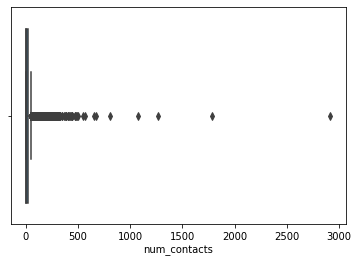

In [263]:
ax=sns.boxplot(x=userdf.num_contacts)
plt.show()

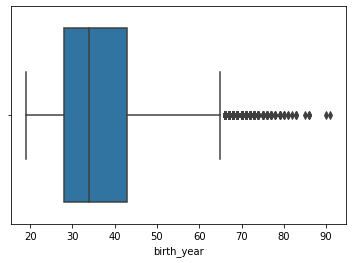

In [264]:
ax=sns.boxplot(x=userdf.birth_year)
plt.show()

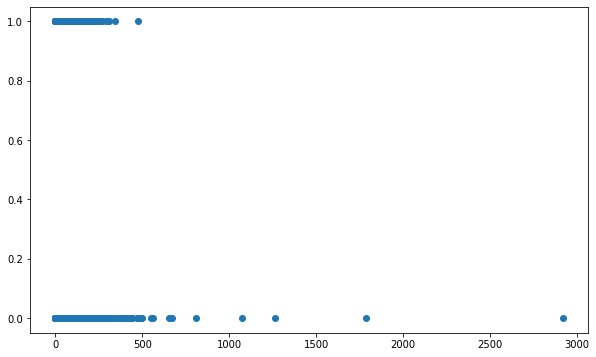

In [265]:
plt.figure(figsize=(10,6))
ax=plt.subplot(1,1,1)
ax.scatter(userdf['num_contacts'],userdf['plan'])

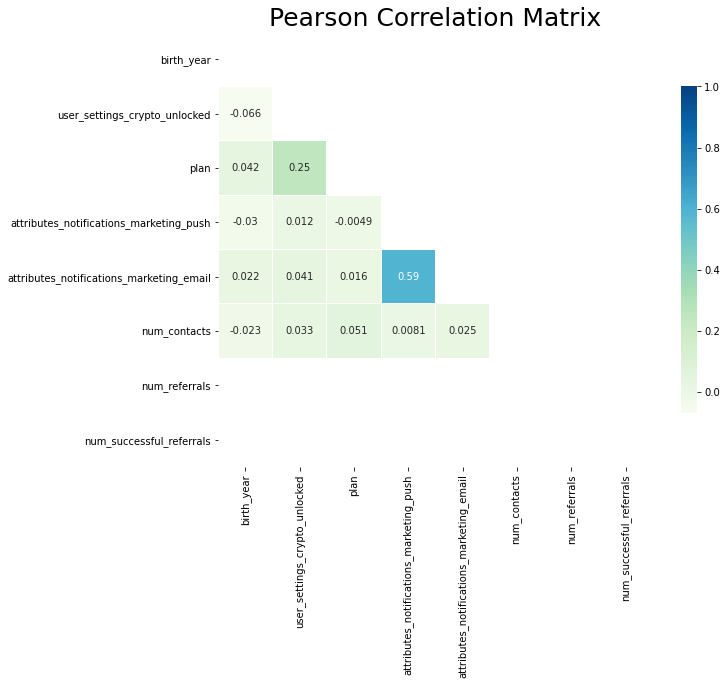

In [266]:
mask = np.zeros_like(userdf.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(10, 8))
plt.title('Pearson Correlation Matrix',fontsize=25)

 

sns.heatmap(userdf.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="GnBu", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75});

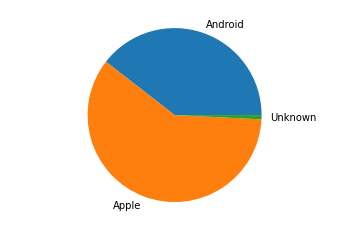

In [268]:
sums = userdf.plan.groupby(userdf.brand).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

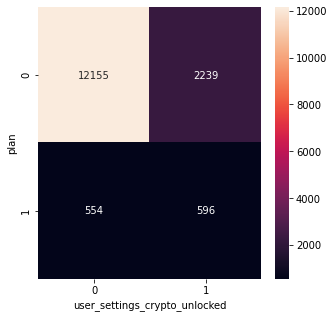

In [273]:
plt.figure(figsize=(5,5))
sns.heatmap(userdf.groupby(['plan','user_settings_crypto_unlocked']).birth_year.count().unstack(),annot=True,fmt='.0f')

In [0]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def corrfunc(x,y,ax=None,**kws):
  r,_=pearsonr(x,y)
  ax=ax or plt.gca()
  rho='\u03C1'
  ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [0]:
ax=sns.pairplot(userdf,hue='plan')
ax.map_lower(corrfunc)
plt.show()

In [0]:
x=userdf.drop('country',axis=1)

In [0]:
def changebrand(x):
  if x=='Apple':
    return 1
  else:
    return 0

In [0]:
x['brand']=x['brand'].apply(changebrand)

In [0]:
x.head(2)

In [0]:
x=x.drop('created_date',axis=1)
         

In [0]:
x.head(1)

In [0]:
userdf